In [29]:
from tensorflow.keras.layers import Input, Flatten, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

from keras.datasets import fashion_mnist
import numpy as np
from keras.utils.np_utils import to_categorical

### Классификация одежды и просмотр различных метрик

In [3]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

In [7]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

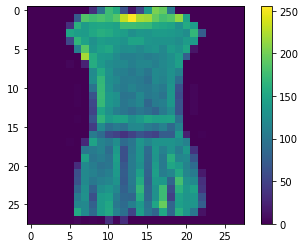

In [10]:
plt.figure()
plt.imshow(X_train[3])
plt.colorbar()
plt.show()

In [11]:
# нормализация 
X_train = X_train / 255.0
X_test = X_test / 255.0

In [38]:
def changing_neurons_or_optimizer(neurons, optimizer):
    """
    Функция для просмотра метрик,
    при изменении кол-ва нейронов
    и вида оптимизатора на 2х слойной модели
    """
    
    global X_train, y_train, X_test, y_test
    
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(neurons, activation='relu'),
        Dense(10)
    ])
    
    model.compile(optimizer=f"{optimizer}",
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    model.fit(X_train, y_train,
          epochs=5,
          batch_size=256,
          validation_data=(X_test, y_test))
    
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

    print('\nTest accuracy:', test_acc)

### Изменение нейронов

In [39]:
changing_neurons_or_optimizer(128, "ADAM")

Epoch 1/5
235/235 [==============================] - 2s 4ms/step - loss: 0.6118 - accuracy: 0.7951 - val_loss: 0.4802 - val_accuracy: 0.8327
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.4287 - accuracy: 0.8521 - val_loss: 0.4333 - val_accuracy: 0.8466
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3861 - accuracy: 0.8664 - val_loss: 0.4107 - val_accuracy: 0.8531
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3612 - accuracy: 0.8720 - val_loss: 0.3912 - val_accuracy: 0.8624
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3395 - accuracy: 0.8796 - val_loss: 0.3733 - val_accuracy: 0.8686
313/313 - 1s - loss: 0.3733 - accuracy: 0.8686 - 521ms/epoch - 2ms/step

Test accuracy: 0.8686000108718872


In [40]:
changing_neurons_or_optimizer(64, "ADAM")

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6586 - accuracy: 0.7792 - val_loss: 0.5266 - val_accuracy: 0.8169
Epoch 2/5
235/235 [==============================] - 1s 3ms/step - loss: 0.4477 - accuracy: 0.8459 - val_loss: 0.4602 - val_accuracy: 0.8375
Epoch 3/5
235/235 [==============================] - 1s 3ms/step - loss: 0.4097 - accuracy: 0.8584 - val_loss: 0.4411 - val_accuracy: 0.8450
Epoch 4/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3861 - accuracy: 0.8645 - val_loss: 0.4184 - val_accuracy: 0.8536
Epoch 5/5
235/235 [==============================] - 1s 3ms/step - loss: 0.3697 - accuracy: 0.8707 - val_loss: 0.4221 - val_accuracy: 0.8562
313/313 - 0s - loss: 0.4221 - accuracy: 0.8562 - 396ms/epoch - 1ms/step

Test accuracy: 0.8561999797821045


In [41]:
changing_neurons_or_optimizer(256, "ADAM")

Epoch 1/5
235/235 [==============================] - 2s 6ms/step - loss: 0.5698 - accuracy: 0.8049 - val_loss: 0.4678 - val_accuracy: 0.8324
Epoch 2/5
235/235 [==============================] - 1s 6ms/step - loss: 0.4099 - accuracy: 0.8558 - val_loss: 0.4168 - val_accuracy: 0.8540
Epoch 3/5
235/235 [==============================] - 1s 6ms/step - loss: 0.3658 - accuracy: 0.8704 - val_loss: 0.3870 - val_accuracy: 0.8624
Epoch 4/5
235/235 [==============================] - 1s 6ms/step - loss: 0.3385 - accuracy: 0.8786 - val_loss: 0.3741 - val_accuracy: 0.8693
Epoch 5/5
235/235 [==============================] - 1s 6ms/step - loss: 0.3184 - accuracy: 0.8870 - val_loss: 0.3673 - val_accuracy: 0.8672
313/313 - 0s - loss: 0.3673 - accuracy: 0.8672 - 440ms/epoch - 1ms/step

Test accuracy: 0.8672000169754028


####  Вывод более 128 нейронов не стоит вводить

### Изменение кол-ва слоёв

#### 3 слоя

In [45]:
model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10)
    ])

model.compile(optimizer="ADAM",
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
model.fit(X_train, y_train,
          epochs=5,
          batch_size=256,
          validation_data=(X_test, y_test))
    
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/5
235/235 [==============================] - 2s 5ms/step - loss: 0.6009 - accuracy: 0.7929 - val_loss: 0.4579 - val_accuracy: 0.8377
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.4088 - accuracy: 0.8558 - val_loss: 0.4113 - val_accuracy: 0.8540
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3628 - accuracy: 0.8700 - val_loss: 0.3931 - val_accuracy: 0.8606
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3407 - accuracy: 0.8783 - val_loss: 0.3791 - val_accuracy: 0.8651
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3165 - accuracy: 0.8862 - val_loss: 0.3592 - val_accuracy: 0.8706
313/313 - 0s - loss: 0.3592 - accuracy: 0.8706 - 449ms/epoch - 1ms/step

Test accuracy: 0.8705999851226807


#### 5 слоев

In [47]:
model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10)
    ])

model.compile(optimizer="ADAM",
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
model.fit(X_train, y_train,
          epochs=5,
          batch_size=256,
          validation_data=(X_test, y_test))
    
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/5
235/235 [==============================] - 2s 6ms/step - loss: 0.5987 - accuracy: 0.7914 - val_loss: 0.4462 - val_accuracy: 0.8402
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3942 - accuracy: 0.8585 - val_loss: 0.4287 - val_accuracy: 0.8444
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3472 - accuracy: 0.8723 - val_loss: 0.3872 - val_accuracy: 0.8639
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3208 - accuracy: 0.8826 - val_loss: 0.3751 - val_accuracy: 0.8651
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3007 - accuracy: 0.8889 - val_loss: 0.3609 - val_accuracy: 0.8677
313/313 - 0s - loss: 0.3609 - accuracy: 0.8677 - 469ms/epoch - 1ms/step

Test accuracy: 0.8676999807357788


#### Увеличение слоёв не дает какого-то сильного прироста в метриках

### Проверка метрик на различных оптимизаторах

In [51]:
# буду использовать 2х слойную модель, но изменять оптимизаторы
changing_neurons_or_optimizer(128, "ADAM")

Epoch 1/5
235/235 [==============================] - 1s 4ms/step - loss: 0.5972 - accuracy: 0.7983 - val_loss: 0.4890 - val_accuracy: 0.8259
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.4210 - accuracy: 0.8532 - val_loss: 0.4390 - val_accuracy: 0.8472
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3774 - accuracy: 0.8679 - val_loss: 0.4094 - val_accuracy: 0.8552
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3518 - accuracy: 0.8753 - val_loss: 0.3853 - val_accuracy: 0.8634
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.3372 - accuracy: 0.8797 - val_loss: 0.3691 - val_accuracy: 0.8687
313/313 - 0s - loss: 0.3691 - accuracy: 0.8687 - 454ms/epoch - 1ms/step

Test accuracy: 0.8687000274658203


In [52]:
changing_neurons_or_optimizer(128, "SGD")

Epoch 1/5
235/235 [==============================] - 2s 5ms/step - loss: 1.2998 - accuracy: 0.6186 - val_loss: 0.9366 - val_accuracy: 0.6941
Epoch 2/5
235/235 [==============================] - 1s 4ms/step - loss: 0.8272 - accuracy: 0.7311 - val_loss: 0.7743 - val_accuracy: 0.7341
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.7162 - accuracy: 0.7638 - val_loss: 0.6963 - val_accuracy: 0.7625
Epoch 4/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6562 - accuracy: 0.7832 - val_loss: 0.6527 - val_accuracy: 0.7789
Epoch 5/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6166 - accuracy: 0.7978 - val_loss: 0.6209 - val_accuracy: 0.7888
313/313 - 1s - loss: 0.6209 - accuracy: 0.7888 - 505ms/epoch - 2ms/step

Test accuracy: 0.7888000011444092


In [53]:
changing_neurons_or_optimizer(128, "RMSProp")

Epoch 1/5
235/235 [==============================] - 2s 5ms/step - loss: 0.6487 - accuracy: 0.7747 - val_loss: 0.5812 - val_accuracy: 0.7875
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.4470 - accuracy: 0.8412 - val_loss: 0.4546 - val_accuracy: 0.8375
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3967 - accuracy: 0.8583 - val_loss: 0.4248 - val_accuracy: 0.8524
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3642 - accuracy: 0.8678 - val_loss: 0.3961 - val_accuracy: 0.8601
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.3436 - accuracy: 0.8753 - val_loss: 0.4286 - val_accuracy: 0.8396
313/313 - 0s - loss: 0.4286 - accuracy: 0.8396 - 464ms/epoch - 1ms/step

Test accuracy: 0.8396000266075134


#### Вывод: на первом месте адам после него RMSProp, SGD